In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc
import pylab
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from scipy.stats import skew
from sklearn.impute import MissingIndicator
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from itertools import cycle
import time
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import precision_score,f1_score, recall_score, accuracy_score

data = pd.read_csv("/Users/QUAN/Documents/PHY_TRAIN.csv")
indicator = MissingIndicator(features = 'missing-only')
missing = indicator.fit_transform(data)
missing.astype(int)
imputer = KNNImputer(n_neighbors = 5)
data = imputer.fit_transform(data)
data = pd.DataFrame(data=data[0:,0:], columns = ["exampleid","target","feat1","feat2","feat3","feat4","feat5","feat6","feat7","feat8","feat9","feat10","feat11","feat12","feat13","feat14","feat15","feat16","feat17","feat18","feat19","feat20","feat21","feat22","feat23","feat24","feat25","feat26","feat27","feat28","feat29","feat30","feat31","feat32","feat33","feat34","feat35","feat36","feat37","feat38","feat39","feat40","feat41","feat42","feat43","feat44","feat45","feat46","feat47","feat48","feat49","feat50","feat51","feat52","feat53","feat54","feat55","feat56","feat57","feat58","feat59","feat60","feat61","feat62","feat63","feat64","feat65","feat66","feat67","feat68","feat69","feat70","feat71","feat72","feat73","feat74","feat75","feat76","feat77","feat78"])
data = data.to_csv("PHY_TRAINPROCESSED.csv")



In [2]:
#I used the Missing Indicator and then KNN Imputer to fill in Missing Values which was done using the code above. So then I exported the Preprocessed Data to a csv so I dont have to keep running the preprocessing over and over again.
data = pd.read_csv("/Users/QUAN/Documents/PHY_TRAINPROCESSED.csv")
data = data.drop(["Unnamed: 0"],axis = 1)

#Returns the columns with missing or null values
missing = data.columns[data.isnull().any()]

for x in missing:
    data[x] = data[x].fillna(data[x].mean())
        

/Users/QUAN/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.33657777777777775
-0.3466332497245914
Precision Score:  0.6583205278857452
F1 Score:  0.657933962690275
Recall Score:  0.6575478512098231
Accuracy Score:  0.6634222222222222


'\nplt.figure()\nlw = 2\nplt.plot(fpr, tpr, color=\'darkorange\',lw=lw, label=\'ROC curve (area = %0.2f)\' % roc_auc)\nplt.plot([0, 1], [0, 1], color=\'navy\', lw=lw, linestyle=\'--\')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'Receiver operating characteristic example\')\nplt.legend(loc="lower right")\nplt.show()\n\n'

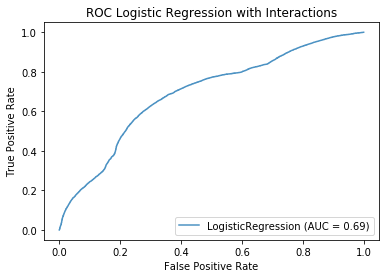

In [3]:
#Logistic Regression with Interactions. The test size is 35% of the data. I computed the RMSE and R^2 of each model and plotted the ROC Curve.
predictors = data.drop(["target","exampleid"],axis=1)
response = data["target"]
x_train_value, x_value, y_train_value, y_value = train_test_split(predictors, response, test_size = 0.45, random_state = 0)

np.random.seed(0)
polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x_train_value)
x_test_poly = polynomial_features.fit_transform(x_value)

model = LogisticRegression()
model.fit(x_poly, y_train_value)
y_poly_pred = model.predict(x_test_poly)
prob = model.decision_function(x_test_poly)
mse = mean_squared_error(y_value,y_poly_pred)
r2 = r2_score(y_value,y_poly_pred)
print(mse)
print(r2)

tn, fp, fn, tp = confusion_matrix(y_value, y_poly_pred).ravel()
fpr, tpr, _ = roc_curve(y_poly_pred,prob)
#roc_auc = auc(fpr, tpr)

ax = plt.gca()
lr_disp = plot_roc_curve(model, x_test_poly, y_value, ax=ax, alpha=0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Logistic Regression with Interactions')

precision = precision_score(y_value, y_poly_pred)
F1 = f1_score(y_value, y_poly_pred)
recall = recall_score(y_value, y_poly_pred)
accuracy = accuracy_score(y_value, y_poly_pred)
print("Precision Score: ", precision)
print("F1 Score: ", F1)
print("Recall Score: ", recall)
print("Accuracy Score: ", accuracy)

"""
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

"""

Training R^2:  -0.22642671640703904
Training MSE:  0.3065333333333333
Precision Score:  0.6878202247191011
F1 Score:  0.6893383180937797
Recall Score:  0.6908631274828458
Accuracy Score:  0.6934666666666667


/Users/QUAN/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


'\nplt.figure()\nlw = 2\nplt.plot(fpr[1], tpr[1], color=\'darkorange\', lw=lw, label=\'ROC curve (area = %0.2f)\' % roc_auc)\nplt.plot([0, 1], [0, 1], color=\'navy\', lw=lw, linestyle=\'--\')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'ROC Logistic Regression without Interactions\')\nplt.legend(loc="lower right")\nplt.show()\n'

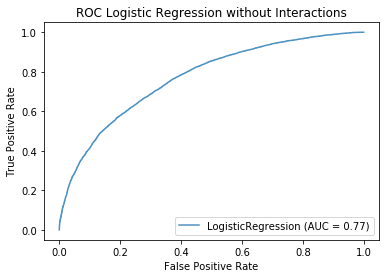

In [5]:
#Logistic Regression without Interactions

predictors = data.drop(["target","exampleid"],axis=1)
response = data["target"]
x_train_value, x_value, y_train_value, y_value = train_test_split(predictors, response, test_size = 0.45, random_state = 0)
model = LogisticRegression()
model.fit(x_train_value,y_train_value)
pred = model.predict(x_value)
proba = model.decision_function(x_value)
mse = mean_squared_error(y_value,pred)
r2 = r2_score(y_value,pred)

print("Training R^2: ", r2)
print("Training MSE: ", mse)

tn, fp, fn, tp = confusion_matrix(y_value, pred).ravel()
fpr, tpr, __ = roc_curve(pred,proba)
roc_auc = auc(fpr, tpr)

ax = plt.gca()
lr_disp = plot_roc_curve(model, x_value, y_value, ax=ax, alpha=0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Logistic Regression without Interactions')

precision = precision_score(y_value, pred)
F1 = f1_score(y_value, pred)
recall = recall_score(y_value, pred)
accuracy = accuracy_score(y_value, pred)
print("Precision Score: ", precision)
print("F1 Score: ", F1)
print("Recall Score: ", recall)
print("Accuracy Score: ", accuracy)


'''
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Logistic Regression without Interactions')
plt.legend(loc="lower right")
plt.show()
'''


Training R^2:  -0.14374026967233222
Training MSE:  0.28586666666666666
Precision Score:  0.7164429530201343
F1 Score:  0.705008255365988
Recall Score:  0.6939328277356447
Accuracy Score:  0.7141333333333333


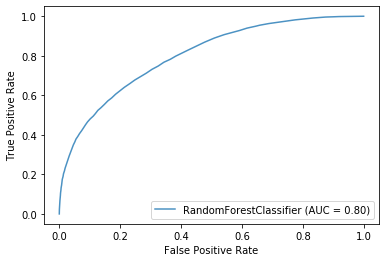

In [6]:
#Random Forest for Gini

predictors = data.drop(["target","exampleid"],axis=1)
response = data["target"]
x_train_value, x_value, y_train_value, y_value = train_test_split(predictors, response, test_size = 0.45, random_state = 0)
Ginirf = RandomForestClassifier(criterion = 'gini')
Ginirf.fit(x_train_value,y_train_value)
Ginirfpred = Ginirf.predict(x_value)

mse = mean_squared_error(y_value,Ginirfpred)
r2 = r2_score(y_value,Ginirfpred)

print("Training R^2: ", r2)
print("Training MSE: ", mse)

precision = precision_score(y_value, Ginirfpred)
F1 = f1_score(y_value, Ginirfpred)
recall = recall_score(y_value, Ginirfpred)
accuracy = accuracy_score(y_value, Ginirfpred)

print("Precision Score: ", precision)
print("F1 Score: ", F1)
print("Recall Score: ", recall)
print("Accuracy Score: ", accuracy)

tn, fp, fn, tp = confusion_matrix(y_value, Ginirfpred).ravel()
ax = plt.gca()
rfc_disp = plot_roc_curve(Ginirf, x_value, y_value, ax=ax, alpha=0.8)
plt.show()

#fpr, tpr, _ = roc_curve(Ginirfpred,proba)
#roc_auc = auc(fpr, tpr)

#plt.figure()
#lw = 2
#plt.plot(fpr, tpr, color='darkorange',
 #        lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
#plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('ROC Logistic Regression without Interactions')
#plt.legend(loc="lower right")
#plt.show()
#t1 = time()
#Ginidt = cross_val_score(Ginirf,data,y=response, n_jobs = -1, verbose = 1, scoring = "accuracy")
#t2 = time()
#GinidtMean = Ginidt.mean()
#print("Mode Run Time", t1-t0)
#print("5 fold cross val time", t2-t1)
#print("Mean Accuracy",GinidtMean)



Training R^2:  -0.14374026967233222
Training MSE:  0.28586666666666666
Precision Score:  0.7164429530201343
F1 Score:  0.705008255365988
Recall Score:  0.6939328277356447
Accuracy Score:  0.7141333333333333


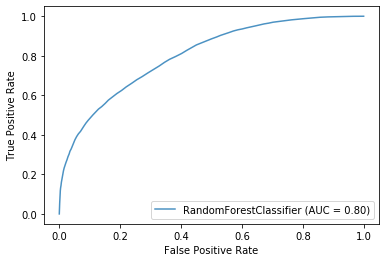

In [7]:
#Random Forest for Entropy

predictors = data.drop(["target","exampleid"],axis=1)
response = data["target"]
x_train_value, x_value, y_train_value, y_value = train_test_split(predictors, response, test_size = 0.45, random_state = 0)
Entropyrf = RandomForestClassifier(criterion = 'entropy')
Entropyrf.fit(x_train_value,y_train_value)
Entropyrfpred = Ginirf.predict(x_value)

mse = mean_squared_error(y_value,Entropyrfpred)
r2 = r2_score(y_value,Entropyrfpred)

print("Training R^2: ", r2)
print("Training MSE: ", mse)
precision = precision_score(y_value, Entropyrfpred)
F1 = f1_score(y_value, Entropyrfpred)
recall = recall_score(y_value, Entropyrfpred)
accuracy = accuracy_score(y_value, Entropyrfpred)

print("Precision Score: ", precision)
print("F1 Score: ", F1)
print("Recall Score: ", recall)
print("Accuracy Score: ", accuracy)

tn, fp, fn, tp = confusion_matrix(y_value, Entropyrfpred).ravel()
ax = plt.gca()
rfc_disp = plot_roc_curve(Entropyrf, x_value, y_value, ax=ax, alpha=0.8)
plt.show()



In [9]:
#Gradient Boosting
predictors = data.drop(["target","exampleid"],axis=1)
response = data["target"]
x_train_value, x_value, y_train_value, y_value = train_test_split(predictors, response, test_size = 0.45, random_state = 0)
clf = GradientBoostingRegressor()
clf.fit(x_train_value, y_train_value)
predict = clf.predict(x_value)
rmse = mean_squared_error(y_value, predict)
r2 = r2_score(y_value,Entropyrfpred)

print("Training R^2: ", r2)
print("Training MSE: ", mse)
'''
precision = precision_score(y_value, predict)
F1 = f1_score(y_value, predict)
recall = recall_score(y_value, predict)
accuracy = accuracy_score(y_value, predict)

print("Precision Score: ", precision)
print("F1 Score: ", F1)
print("Recall Score: ", recall)
print("Accuracy Score: ", accuracy)

#tn, fp, fn, tp = confusion_matrix(y_value, predict).ravel()
ax = plt.gca()
rfc_disp = plot_roc_curve(clf, x_value, y_value, ax=ax, alpha=0.8)
plt.show()

'''



Training R^2:  -0.14374026967233222
Training MSE:  0.28586666666666666


'\nprecision = precision_score(y_value, predict)\nF1 = f1_score(y_value, predict)\nrecall = recall_score(y_value, predict)\naccuracy = accuracy_score(y_value, predict)\n\nprint("Precision Score: ", precision)\nprint("F1 Score: ", F1)\nprint("Recall Score: ", recall)\nprint("Accuracy Score: ", accuracy)\n\n#tn, fp, fn, tp = confusion_matrix(y_value, predict).ravel()\nax = plt.gca()\nrfc_disp = plot_roc_curve(clf, x_value, y_value, ax=ax, alpha=0.8)\nplt.show()\n\n'